<a href="https://colab.research.google.com/github/hellloooooo/Machine_learning/blob/main/%D0%A2%D1%80%D0%BE%D1%85%D0%B8%D0%BC%D0%B5%D1%86%D1%8C_%D0%BF%D1%80_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Трохимець М.В. ФІТ 4-8

Варіант 30

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

Завантажити датасет, вивести перші 10 зображень.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


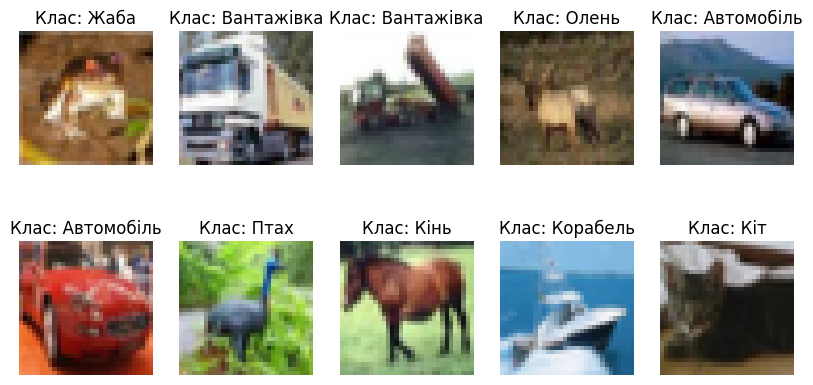

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['Літак', 'Автомобіль', 'Птах', 'Кіт', 'Олень', 'Собака', 'Жаба', 'Кінь', 'Корабель', 'Вантажівка']

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f'Клас: {class_names[y_train[i][0]]}')
    plt.axis('off')
plt.show()

Підготувати дані.

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Підібрати архітектуру моделі. Вивести summary.

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Вивести summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,049,034 (4.00 MB)

 Trainable params: 1,048,074 (4.00 MB)

 Non-trainable params: 960 (3.75 KB)

При навчанні використовувати кол-бекі (рання зупинка та (або) зменшення швидкості навчання)

In [5]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(x_train, y_train, epochs=50, batch_size=32,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.3171 - loss: 1.9743 - val_accuracy: 0.5226 - val_loss: 1.3515 - learning_rate: 0.0010
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.5691 - loss: 1.2368 - val_accuracy: 0.6393 - val_loss: 1.0267 - learning_rate: 0.0010
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6579 - loss: 0.9971 - val_accuracy: 0.6761 - val_loss: 0.9306 - learning_rate: 0.0010
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7071 - loss: 0.8701 - val_accuracy: 0.5901 - val_loss: 1.2549 - learning_rate: 0.0010
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7475 - loss: 0.7587 - val_accuracy: 0.6613 - val_loss: 1.0043 - learning_rate: 0.0010
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7818 - loss: 0.6637 - val_accuracy: 0.7429 - val_loss: 0.7735 - learning_rate: 0.0010
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.805

Побудувати графіки функції втрат і точності.

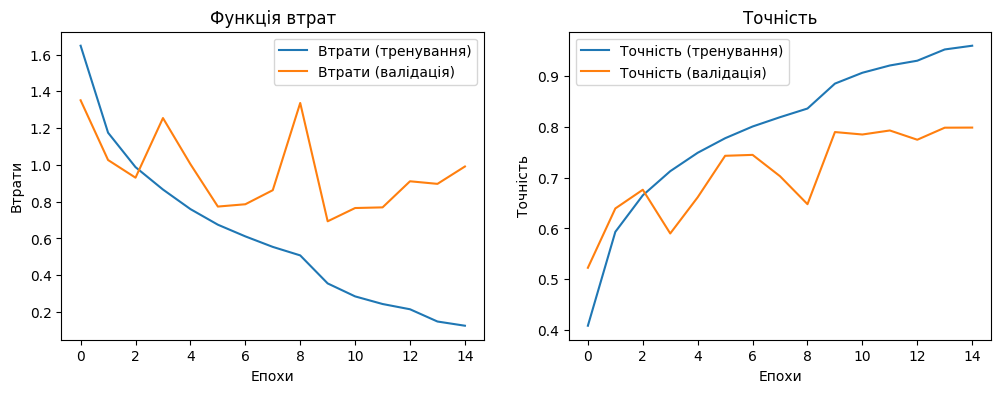

In [6]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Втрати (тренування)')
plt.plot(history.history['val_loss'], label='Втрати (валідація)')
plt.title('Функція втрат')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точність (тренування)')
plt.plot(history.history['val_accuracy'], label='Точність (валідація)')
plt.title('Точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()

plt.show()

Класифікаційний звіт

In [7]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      1000
           1       0.92      0.89      0.91      1000
           2       0.78      0.64      0.70      1000
           3       0.54      0.69      0.61      1000
           4       0.73      0.76      0.75      1000
           5       0.74      0.69      0.71      1000
           6       0.88      0.79      0.83      1000
           7       0.85      0.82      0.84      1000
           8       0.87      0.89      0.88      1000
           9       0.89      0.86      0.87      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



Візуалізація результатів розпізнавання

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


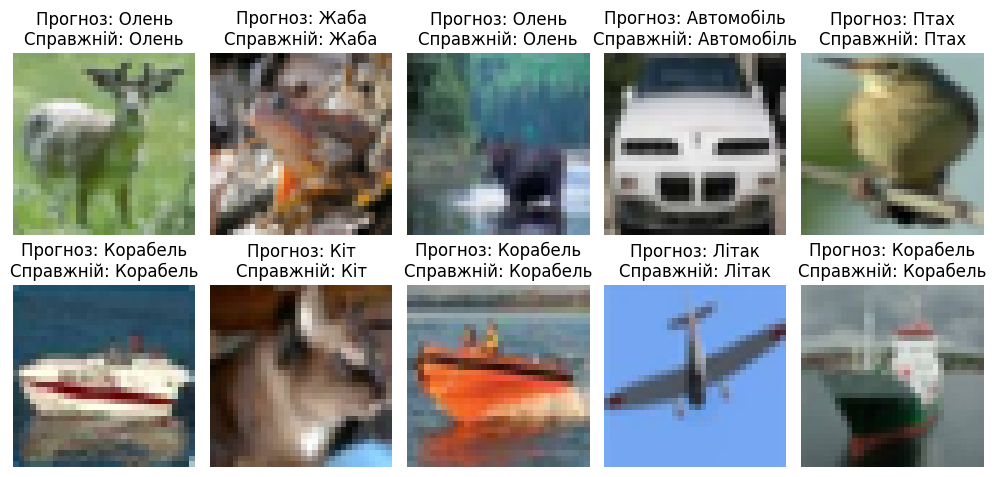

In [8]:
num_samples = 10
indices = np.random.choice(len(x_test), num_samples, replace=False)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 5))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[index])
    plt.title(f"Прогноз: {class_names[y_pred_classes[index]]}\nСправжній: {class_names[y_true_classes[index]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

**Висновок:** Модель досягає загальної точності 0.79 на тестовому наборі даних CIFAR-10. Я був здивований ,але на візуалізації данних можна побачити що НМ правильно розпізнала всі класи ,що є чудовим результатом.